In [19]:
import pandas as pd
import numpy as np

# Generate sample data CSV for Futher testing
dates = pd.date_range(start='2023-01-01', periods=365)
months = dates.strftime('%Y%m%d').astype(int)

# Create synthetic humidity data
np.random.seed(0)
avg_humidity = np.random.uniform(30, 70, size=365)
max_humidity = avg_humidity + np.random.uniform(5, 15, size=365)
min_humidity = avg_humidity - np.random.uniform(5, 15, size=365)

# Create DataFrame
data = {
    'Date': months,
    'AvgHumidity': avg_humidity,
    'MaxHumidity': max_humidity,
    'MinHumidity': min_humidity
}
df = pd.DataFrame(data)
print ("Generate the CSV...")
# Save to CSV
df.to_csv('weather_data.csv', index=False)


Generate the CSV...


Maximum Humidity: 83.6872148203438
Average Humidity: 49.66579400055256 Std Dev: 11.55207457762973
Minimum Humidity: 16.800677934809123


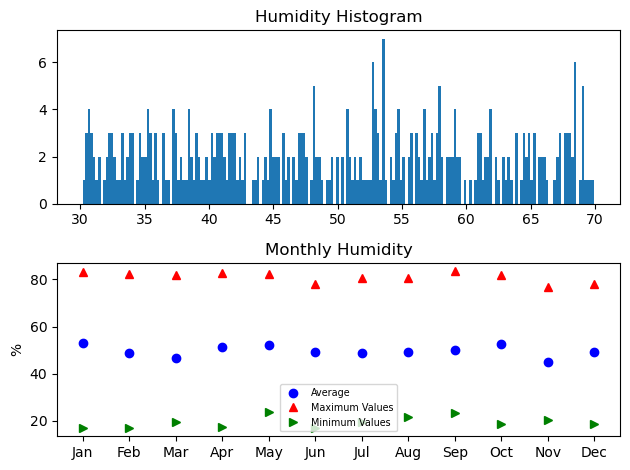

In [15]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import sys
from datetime import datetime as dt
import calendar as cal

# Lambda functions to convert data
to_float = lambda x: float(x.strip() or np.nan)
to_month = lambda x: dt.strptime(x.decode('utf-8'), "%Y%m%d").month

# Load data from the file specified in the command line argument
# Usecols specifies the columns to read: 0 for date, 1 for avg humidity, 2 for max humidity, 3 for min humidity
#months, avg_h, max_h, min_h = np.loadtxt(sys.argv[1], delimiter=',', usecols=(0, 1, 2, 3), unpack=True, converters={0: to_month, 1: to_float, 2: to_float, 3: to_float}, skiprows=1)

# Load data from the file specified in the command line argument
# Usecols specifies the columns to read: 0 for date, 1 for avg humidity, 2 for max humidity, 3 for min humidity
months, avg_h, max_h, min_h = np.loadtxt('weather_data.csv', delimiter=',', usecols=(0, 1, 2, 3), unpack=True, converters={0: to_month, 1: to_float, 2: to_float, 3: to_float}, skiprows=1)

# Mask invalid (NaN) values
max_h = ma.masked_invalid(max_h)
avg_h = ma.masked_invalid(avg_h)
min_h = ma.masked_invalid(min_h)

# Print humidity statistics
print(f"Maximum Humidity: {max_h.max()}")
print(f"Average Humidity: {avg_h.mean()} Std Dev: {avg_h.std()}")
print(f"Minimum Humidity: {min_h.min()}")

# Calculate monthly humidity statistics
monthly_humidity = []
maxes = []
mins = []
month_range = np.arange(int(months.min()), int(months.max()) + 1)

for month in month_range:
    indices = np.where(month == months)
    monthly_humidity.append(avg_h[indices].mean())
    maxes.append(max_h[indices].max())
    mins.append(min_h[indices].min())

# Plot histogram of average humidity
plt.subplot(211)
plt.title("Humidity Histogram")
plt.hist(avg_h.compressed(), 200)

# Plot monthly humidity statistics
ax = plt.subplot(212)
plt.title("Monthly Humidity")
plt.plot(month_range, monthly_humidity, 'bo', label="Average")
plt.plot(month_range, maxes, 'r^', label="Maximum Values")
plt.plot(month_range, mins, 'g>', label="Minimum Values")
ax.set_xticks(month_range)  # Set x-ticks to month range
ax.set_xticklabels([cal.month_abbr[i] for i in month_range])  # Set month abbreviations as x-tick labels
plt.legend(prop={'size': 'x-small'}, loc='best')
ax.set_ylabel('%')
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

In [23]:
import pandas as pd
import numpy as np

# Generate sample data for the Next Script
dates = pd.date_range(start='2023-01-01', periods=365)
months = dates.strftime('%Y%m%d').astype(str)

# Create synthetic pressure data
np.random.seed(0)
avg_pressure = np.random.uniform(990, 1020, size=365) * 10  # in tenths of hPa
max_pressure = avg_pressure + np.random.uniform(0, 10, size=365) * 10
min_pressure = avg_pressure - np.random.uniform(0, 10, size=365) * 10

# Create DataFrame
data = {
    'Date': months,
    'AvgPressure': avg_pressure,
    'MaxPressure': max_pressure,
    'MinPressure': min_pressure
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('pressure_data.csv', index=False)


Maximum Pressure: 1028.9122634228995
Average Pressure: 1004.7493455004143 Std Dev: 8.664055933222297
Minimum Pressure: 981.6835370929592


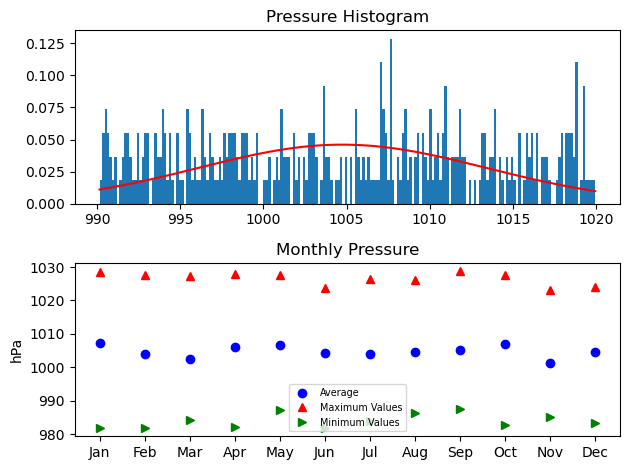

In [29]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import sys
from datetime import datetime as dt
import calendar as cal

# Lambda functions to convert data
to_float = lambda x: 0.1 * float(x.strip() or np.nan)
to_month = lambda x: dt.strptime(x.decode('utf-8'), "%Y%m%d").month

# Load data from the file specified in the command line argument
# Usecols specifies the columns to read: 0 for date, 1 for avg pressure, 2 for max pressure, 3 for min pressure
months, avg_p, max_p, min_p = np.loadtxt('pressure_data.csv', delimiter=',', usecols=(0, 1, 2, 3), unpack=True, converters={0: to_month, 1: to_float, 2: to_float, 3: to_float}, skiprows=1, dtype=str)

# Convert columns to appropriate types after loading
months = months.astype(np.int32)
avg_p = avg_p.astype(np.float64)
max_p = max_p.astype(np.float64)
min_p = min_p.astype(np.float64)

# Mask invalid (NaN) values
max_p = ma.masked_invalid(max_p)
print("Maximum Pressure:", max_p.max())

avg_p = ma.masked_invalid(avg_p)
print("Average Pressure:", avg_p.mean(), "Std Dev:", avg_p.std())

min_p = ma.masked_invalid(min_p)
print("Minimum Pressure:", min_p.min())

# Calculate monthly pressure statistics
monthly_pressure = []
maxes = []
mins = []
month_range = np.arange(int(months.min()), int(months.max()) + 1)

for month in month_range:
    indices = np.where(month == months)
    monthly_pressure.append(avg_p[indices].mean())
    maxes.append(max_p[indices].max())
    mins.append(min_p[indices].min())

# Plot histogram of average pressure
plt.subplot(211)
plt.title("Pressure Histogram")
a, bins, b = plt.hist(avg_p.compressed(), 200, density=True)
stdev = avg_p.std()
avg = avg_p.mean()
plt.plot(bins, 1/(stdev * np.sqrt(2 * np.pi)) * np.exp(- (bins - avg)**2/(2 * stdev**2)), 'r-')

# Plot monthly pressure statistics
ax = plt.subplot(212)
plt.title("Monthly Pressure")
plt.plot(month_range, monthly_pressure, 'bo', label="Average")
plt.plot(month_range, maxes, 'r^', label="Maximum Values")
plt.plot(month_range, mins, 'g>', label="Minimum Values")
ax.set_xticks(month_range)  # Set x-ticks to month range
ax.set_xticklabels([cal.month_abbr[i] for i in month_range])  # Set month abbreviations as x-tick labels
plt.legend(prop={'size': 'x-small'}, loc='best')
ax.set_ylabel('hPa')
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


In [37]:
"""
Temperature Analysis Script
"""

import sys
from datetime import datetime as dt
import numpy as np
import numpy.ma as ma

# Lambda functions to convert data
TO_FLOAT = lambda x: float(x.strip() or np.nan)
TO_DATE = lambda x: dt.strptime(x.decode('utf-8'), "%Y%m%d").toordinal()

def main(filename):
    """
    Main function to load data and perform temperature analysis.
    """
    dates, avg_temp, min_temp, max_temp = np.loadtxt(
        filename, delimiter=',', usecols=(0, 1, 2, 3), unpack=True,
        converters={0: TO_DATE, 1: TO_FLOAT, 2: TO_FLOAT, 3: TO_FLOAT},
        skiprows=1, dtype=str
    )

    # Convert data to float
    avg_temp = avg_temp.astype(np.float64)
    min_temp = min_temp.astype(np.float64)
    max_temp = max_temp.astype(np.float64)

    # Measurements are in .1 degrees Celsius
    avg_temp = 0.1 * avg_temp
    min_temp = 0.1 * min_temp
    max_temp = 0.1 * max_temp

    # Freezing %
    print("% days min below 0", 100 * len(min_temp[min_temp < 0]) / float(len(min_temp)))
    print("% days max below 0", 100 * len(max_temp[max_temp < 0]) / float(len(max_temp)))
    print()

    # Daily ranges
    ranges = max_temp - min_temp
    print("Minimum daily range", np.nanmin(ranges))
    print("Maximum daily range", np.nanmax(ranges))

    masked_ranges = ma.array(ranges, mask=np.isnan(ranges))
    print("Average daily range", masked_ranges.mean())
    print("Standard deviation", masked_ranges.std())

    masked_mins = ma.array(min_temp, mask=np.isnan(min_temp))
    print("Average minimum temperature", masked_mins.mean(), "Standard deviation", masked_mins.std())

    masked_maxs = ma.array(max_temp, mask=np.isnan(max_temp))
    print("Average maximum temperature", masked_maxs.mean(), "Standard deviation", masked_maxs.std())

if __name__ == "__main__":
    #main(sys.argv[1])
    main('temperature_data.csv')
    



% days min below 0 27.123287671232877
% days max below 0 3.5616438356164384

Minimum daily range 0.24432945063357536
Maximum daily range 19.215764975896185
Average daily range 9.907065157112491
Standard deviation 4.0562900771726245
Average minimum temperature 9.69504837662834 Standard deviation 11.833552486194426
Average maximum temperature 19.602113533740834 Standard deviation 12.084266488390762


In [33]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2023-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-5, 35, size=365) * 10  # in tenths of degrees Celsius
min_temp = avg_temp - np.random.uniform(0, 10, size=365) * 10
max_temp = avg_temp + np.random.uniform(0, 10, size=365) * 10

# Create DataFrame
data = {
    'Date': dates_str,
    'AvgTemp': avg_temp,
    'MinTemp': min_temp,
    'MaxTemp': max_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data.csv', index=False)
print('temperature_data.csv generated successfully.')


temperature_data.csv generated successfully.


First Year: 2000 Last Year: 2020
First half average: 15.071383988336272 Std Dev: 11.650901640379113
Second half average: 14.608773279637603 Std Dev: 11.490761411947318


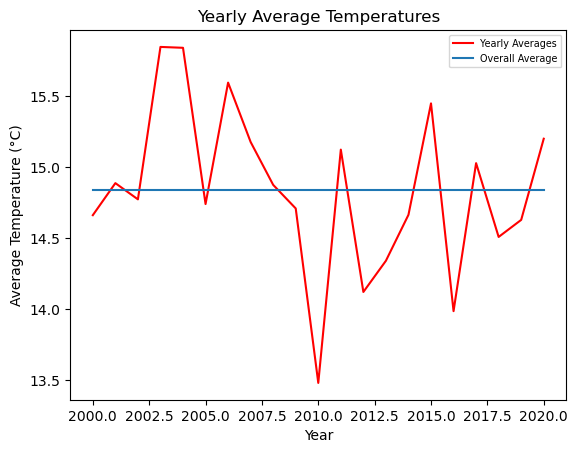

In [51]:
"""
Yearly Temperature Analysis Script
"""

import sys
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Lambda functions to convert data
TO_YEAR = lambda x: dt.strptime(x.decode('utf-8'), "%Y%m%d").year

def main(filename):
    """
    Main function to load data and perform yearly temperature analysis.
    """
    years, avg_temp = np.loadtxt(
        filename, delimiter=',', usecols=(0, 1), unpack=True,
        converters={0: TO_YEAR, 1: float}, skiprows=1, dtype=str
    )

    # Convert years to integers
    years = years.astype(int)

    # Measurements are in .1 degrees Celsius
    avg_temp = 0.1 * avg_temp.astype(float)

    N = len(avg_temp)
    print("First Year:", years[0], "Last Year:", years[-1])
    assert N == len(years)
    assert years[:N//2].mean() < years[N//2:].mean()
    print("First half average:", avg_temp[:N//2].mean(), "Std Dev:", avg_temp[:N//2].std())
    print("Second half average:", avg_temp[N//2:].mean(), "Std Dev:", avg_temp[N//2:].std())

    avgs = []
    year_range = range(years[0], years[-1] + 1)

    for year in year_range:
        indices = np.where(years == year)
        avgs.append(avg_temp[indices].mean())

    plt.plot(year_range, avgs, 'r-', label="Yearly Averages")
    plt.plot(year_range, np.ones(len(avgs)) * np.mean(avgs), label="Overall Average")
    plt.legend(prop={'size': 'x-small'})
    plt.xlabel("Year")
    plt.ylabel("Average Temperature (°C)")
    plt.title("Yearly Average Temperatures")
    plt.show()

if __name__ == "__main__":
    main('yearly_temperature_data.csv')






In [47]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2000-01-01', end='2020-12-31', freq='D')
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
avg_temp = np.random.uniform(-5, 35, size=len(dates)) * 10  # in tenths of degrees Celsius

# Create DataFrame
data = {
    'Date': dates_str,
    'AvgTemp': avg_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('yearly_temperature_data.csv', index=False)
print('yearly_temperature_data.csv generated successfully.')



yearly_temperature_data.csv generated successfully.


In [61]:
"""
Temperature Analysis Script
"""

import sys
import numpy as np

# Lambda function to convert data
TO_FLOAT = lambda x: float(x.strip() or np.nan)

def main(filename):
    """
    Main function to load data and perform temperature analysis.
    """
    min_temp, max_temp = np.loadtxt(
        filename, delimiter=',', usecols=(1, 2), unpack=True,
        converters={1: TO_FLOAT, 2: TO_FLOAT}, skiprows=1
    )

    # Measurements are in .1 degrees Celsius
    min_temp = 0.1 * min_temp
    max_temp = 0.1 * max_temp

    print("# Records:", len(min_temp), len(max_temp))
    print("Minimum Temperature:", np.nanmin(min_temp))
    print("Maximum Temperature:", np.nanmax(max_temp))

if __name__ == "__main__":
    main('temperature_data.csv')


# Records: 7671 7671
Minimum Temperature: -4.998551007230157
Maximum Temperature: 19.91025812199682


In [55]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2000-01-01', end='2020-12-31', freq='D')
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature data
np.random.seed(0)
min_temp = np.random.uniform(-50, 150, size=len(dates))  # in tenths of degrees Celsius
max_temp = min_temp + np.random.uniform(0, 50, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame
data = {
    'Date': dates_str,
    'MinTemp': min_temp,
    'MaxTemp': max_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_data.csv', index=False)
print('temperature_data.csv generated successfully.')


temperature_data.csv generated successfully.


In [69]:
"""
Rain Analysis Script
"""

import sys
from datetime import datetime as dt
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import calendar as cal

# Lambda functions to convert data
TO_FLOAT = lambda x: float(x.strip() or np.nan)
TO_MONTH = lambda x: dt.strptime(x.decode('utf-8'), "%Y%m%d").month

def main(filename):
    """
    Main function to load data and perform rain analysis.
    """
    months, duration, rain = np.loadtxt(
        filename, delimiter=',', usecols=(0, 1, 2), unpack=True,
        converters={0: TO_MONTH, 1: TO_FLOAT, 2: TO_FLOAT}, skiprows=1, dtype=str
    )

    # Remove -1 values
    rain[rain == -1] = 0

    # Measurements are in .1 mm
    rain = 0.1 * ma.masked_invalid(rain.astype(float))

    # Measurements are in .1 hours
    duration = 0.1 * ma.masked_invalid(duration.astype(float))

    print("# Rain values:", len(rain.compressed()))
    print("Min Rain (hours):", rain.min(), "Max Rain (hours):", rain.max())
    print("Average Rain (mm):", rain.mean(), "Std. Dev (mm):", rain.std())

    mask = ~duration.mask & ~rain.mask
    print("Correlation with duration:", np.corrcoef(duration[mask], rain[mask])[0][1])

if __name__ == "__main__":
    main('rain_data.csv')



# Rain values: 365
Min Rain (hours): 0.27032138935026984 Max Rain (hours): 99.92779939221712
Average Rain (mm): 49.70745623924224 Std. Dev (mm): 29.506287721632123
Correlation with duration: 0.03115179260074168


In [65]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic duration and rain data
np.random.seed(0)
duration = np.random.uniform(0, 10, size=len(dates)) * 10  # in tenths of hours
rain = np.random.uniform(0, 100, size=len(dates)) * 10  # in tenths of mm

# Create DataFrame
data = {
    'Date': dates_str,
    'Duration': duration,
    'Rain': rain
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('rain_data.csv', index=False)
print('rain_data.csv generated successfully.')


rain_data.csv generated successfully.


In [77]:
"""
Rain and Sun Analysis Script
"""

import sys
from datetime import datetime as dt
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import calendar as cal

# Lambda functions to convert data
TO_FLOAT = lambda x: float(x.strip() or np.nan)
TO_MONTH = lambda x: dt.strptime(x.decode('utf-8'), "%Y%m%d").month

def main(filename):
    """
    Main function to load data and perform rain and sun analysis.
    """
    months, sun_hours, rain_hours = np.loadtxt(
        filename, delimiter=',', usecols=(1, 18, 21), unpack=True,
        converters={1: TO_MONTH, 18: TO_FLOAT, 21: TO_FLOAT}, skiprows=1, dtype=str
    )

    # Measurements are in .1 hours
    rain_hours = 0.1 * ma.masked_invalid(rain_hours)

    # Get rid of -1 values
    print("# -1 values Before:", len(sun_hours[sun_hours == -1]))
    sun_hours[sun_hours == -1] = 0
    print("# -1 values After:", len(sun_hours[sun_hours == -1]))
    sun_hours = 0.1 * ma.masked_invalid(sun_hours)

    print("# Rain hours values:", len(rain_hours.compressed()))
    print("Min Rain hours:", rain_hours.min(), "Max Rain hours:", rain_hours.max())
    print("Average Rain hours:", rain_hours.mean(), "Std. Dev Rain hours:", rain_hours.std())

    monthly_rain = []
    monthly_sun = []
    month_range = np.arange(int(months.min()), int(months.max()) + 1)

    for month in month_range:
        indices = np.where(month == months)
        monthly_rain.append(rain_hours[indices].mean())
        monthly_sun.append(sun_hours[indices].mean())

    plt.subplot(211)
    plt.title("Precipitation Duration Histogram")
    plt.hist(rain_hours[rain_hours > 0].compressed(), bins=200)

    width = 0.42
    ax = plt.subplot(212)
    plt.title("Monthly Precipitation and Sun Duration")
    plt.bar(month_range, monthly_rain, width, label='Rain Hours')
    plt.bar(month_range + width, monthly_sun, width, color='red', label='Sun Hours')
    plt.legend()
    ax.set_xticks(month_range)
    ax.set_xticklabels([cal.month_abbr[m] for m in month_range])
    ax.set_ylabel('Hours')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main('rain_sun_data.csv')


ValueError: could not convert string '548.8135039273247' to object at row 0, column 2.

In [99]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic sun and rain hours data
np.random.seed(0)
sun_hours = np.random.uniform(0, 1000, size=len(dates))  # in tenths of hours
rain_hours = np.random.uniform(0, 1000, size=len(dates))  # in tenths of hours

# Create DataFrame
data = {
    'Date': dates_str,
    'SunHours': sun_hours,
    'RainHours': rain_hours
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('rain_sun_data.csv', index=False, float_format='%.2f')
print('rain_sun_data.csv generated successfully.')


rain_sun_data.csv generated successfully.


# -1 values Before: 0
# -1 values After: 0
# Rain hours values: 365
Min Rain hours: 0.27 Max Rain hours: 99.928
Average Rain hours: 49.70743792808219 Std. Dev Rain hours: 29.5063000979558


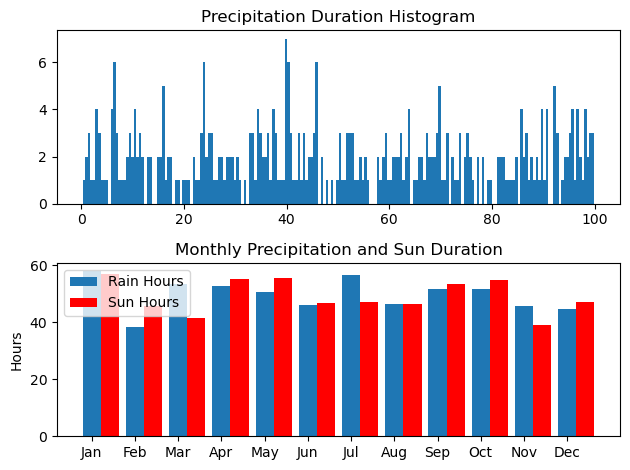

In [101]:
"""
Rain and Sun Analysis Script
"""

import sys
from datetime import datetime as dt
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import calendar as cal

# Lambda functions to convert data
TO_FLOAT = lambda x: float(x.strip() or np.nan)
TO_MONTH = lambda x: dt.strptime(x, "%Y%m%d").month

def main(filename):
    """
    Main function to load data and perform rain and sun analysis.
    """
    # Read the CSV file and convert columns
    data = np.genfromtxt(
        filename, delimiter=',', skip_header=1,
        converters={0: TO_MONTH, 1: TO_FLOAT, 2: TO_FLOAT},
        dtype=[('month', 'i4'), ('sun_hours', 'f4'), ('rain_hours', 'f4')],
        encoding=None
    )
    
    months = data['month']
    sun_hours = data['sun_hours']
    rain_hours = data['rain_hours']

    # Measurements are in .1 hours
    rain_hours = 0.1 * ma.masked_invalid(rain_hours)

    # Get rid of -1 values in sun_hours
    print("# -1 values Before:", len(sun_hours[sun_hours == -1]))
    sun_hours[sun_hours == -1] = 0
    print("# -1 values After:", len(sun_hours[sun_hours == -1]))
    sun_hours = 0.1 * ma.masked_invalid(sun_hours)

    print("# Rain hours values:", len(rain_hours.compressed()))
    print("Min Rain hours:", rain_hours.min(), "Max Rain hours:", rain_hours.max())
    print("Average Rain hours:", rain_hours.mean(), "Std. Dev Rain hours:", rain_hours.std())

    monthly_rain = []
    monthly_sun = []
    month_range = np.arange(int(months.min()), int(months.max()) + 1)

    for month in month_range:
        indices = np.where(months == month)
        monthly_rain.append(rain_hours[indices].mean())
        monthly_sun.append(sun_hours[indices].mean())

    plt.subplot(211)
    plt.title("Precipitation Duration Histogram")
    plt.hist(rain_hours[rain_hours > 0].compressed(), bins=200)

    width = 0.42
    ax = plt.subplot(212)
    plt.title("Monthly Precipitation and Sun Duration")
    plt.bar(month_range, monthly_rain, width, label='Rain Hours')
    plt.bar(month_range + width, monthly_sun, width, color='red', label='Sun Hours')
    plt.legend()
    ax.set_xticks(month_range)
    ax.set_xticklabels([cal.month_abbr[m] for m in month_range])
    ax.set_ylabel('Hours')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main('rain_sun_data.csv')


In [113]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2000-01-01', end='2020-12-31', freq='D')
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic temperature and radiation data
np.random.seed(0)
avg_temp = np.random.uniform(-500, 1500, size=len(dates))  # in tenths of degrees Celsius
radiation = np.random.uniform(0, 1000, size=len(dates))  # arbitrary units

# Create DataFrame
data = {
    'Date': dates_str,
    'Year': dates.year,
    'AvgTemp': avg_temp,
    'Radiation': radiation
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('temperature_radiation_data.csv', index=False, float_format='%.2f')
print('temperature_radiation_data.csv generated successfully.')


temperature_radiation_data.csv generated successfully.


# temperature values: 7671 # radiation values: 7671
Radiation Min: 0.17 Radiation Max: 999.98
Radiation Average: 493.8366249511146 Std Dev: 289.6224530820414
Correlation Coefficient: 0.006867655782122775


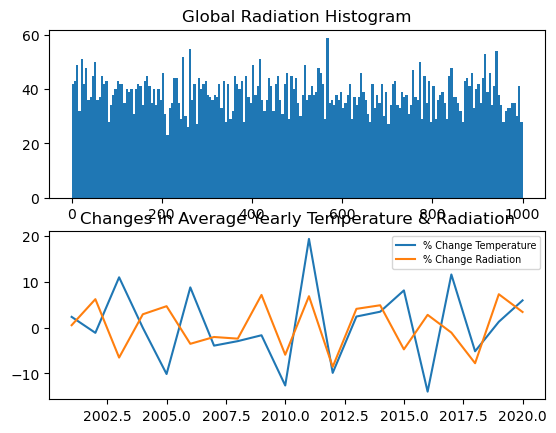

In [115]:
"""
Temperature and Radiation Analysis Script
"""

import sys
from datetime import datetime as dt
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

# Lambda functions to convert data
TO_FLOAT = lambda x: float(x.strip() or np.nan)
TO_YEAR = lambda x: dt.strptime(x, "%Y%m%d").year

def main(filename):
    """
    Main function to load data and perform temperature and radiation analysis.
    """
    # Read the CSV file and convert columns
    data = np.genfromtxt(
        filename, delimiter=',', skip_header=1,
        converters={0: TO_YEAR, 2: TO_FLOAT, 3: TO_FLOAT},
        dtype=[('Date', 'i4'), ('Year', 'i4'), ('AvgTemp', 'f4'), ('Radiation', 'f4')],
        encoding=None
    )
    
    years = data['Year']
    avg_temp = data['AvgTemp']
    radiation = data['Radiation']

    # Measurements are in .1 degrees Celsius
    avg_temp = 0.1 * avg_temp

    # Mask invalid radiation values
    radiation = ma.masked_invalid(radiation)

    print("# temperature values:", len(avg_temp), "# radiation values:", len(radiation.compressed()))
    print("Radiation Min:", radiation.min(), "Radiation Max:", radiation.max())
    print("Radiation Average:", radiation.mean(), "Std Dev:", radiation.std())

    match_temp = avg_temp[~radiation.mask]
    print("Correlation Coefficient:", np.corrcoef(match_temp, radiation.compressed())[0][1])

    avg_temps = []
    avg_radiations = []
    year_range = range(int(years.min()), int(years.max()) + 1)

    for year in year_range:
        indices = np.where(years == year)
        avg_temps.append(avg_temp[indices].mean())
        avg_radiations.append(radiation[indices].mean())

    def percents(a):
        return 100 * np.diff(a) / a[:-1]

    plt.subplot(211)
    plt.title("Global Radiation Histogram")
    plt.hist(radiation.compressed(), bins=200)

    plt.subplot(212)
    plt.title("Changes in Average Yearly Temperature & Radiation")
    plt.plot(year_range[1:], percents(avg_temps), label='% Change Temperature')
    plt.plot(year_range[1:], percents(avg_radiations), label='% Change Radiation')
    plt.legend(prop={'size': 'x-small'})
    plt.show()

if __name__ == "__main__":
    main('temperature_radiation_data.csv')


In [117]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic wind direction and temperature data
np.random.seed(0)
wind_direction = np.random.uniform(0, 360, size=len(dates))
avg_temp = np.random.uniform(-500, 1500, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame
data = {
    'Date': dates_str,
    'WindDirection': wind_direction,
    'AvgTemp': avg_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('wind_temp_data.csv', index=False, float_format='%.2f')
print('wind_temp_data.csv generated successfully.')


wind_temp_data.csv generated successfully.


In [119]:
"""
Wind Direction and Temperature Analysis Script
"""

import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import sys

# Lambda functions to convert data
TO_FLOAT = lambda x: float(x.strip() or np.nan)

def main(filename):
    """
    Main function to load data and perform wind direction and temperature analysis.
    """
    wind_direction, avg_temp = np.loadtxt(
        filename, delimiter=',', usecols=(2, 11), unpack=True,
        converters={2: TO_FLOAT, 11: TO_FLOAT}, skiprows=1, dtype=str
    )
    
    # Mask invalid wind direction values
    wind_direction = ma.masked_invalid(wind_direction.astype(float))

    # Measurements are in .1 degrees Celsius
    avg_temp = 0.1 * avg_temp.astype(float)

    avgs = []

    for direction in range(360):
        indices = np.where(direction == wind_direction)
        if len(indices[0]) > 0:
            avgs.append(avg_temp[indices].mean())
        else:
            avgs.append(np.nan)

    plt.subplot(211)
    plt.title("Wind Direction Histogram")
    plt.hist(wind_direction.compressed(), bins=200)

    plt.subplot(212)
    plt.title("Average Temperature vs Wind Direction")
    plt.plot(np.arange(360), avgs)
    plt.xlabel('Wind Direction (degrees)')
    plt.ylabel('Average Temperature (°C)')
    plt.show()

if __name__ == "__main__":
    main('wind_temp_data.csv')


ValueError: invalid column index 11 at row 1 with 3 columns

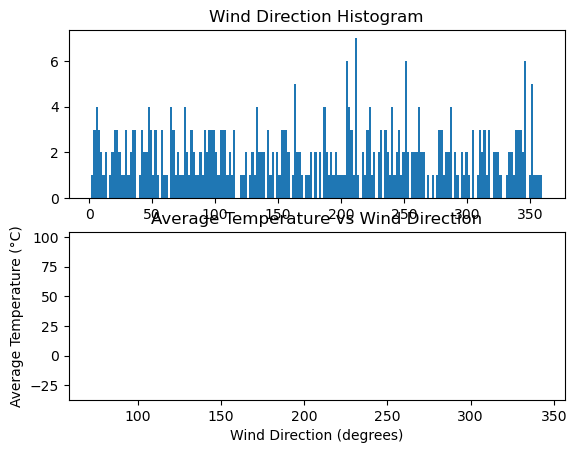

In [121]:
"""
Wind Direction and Temperature Analysis Script
"""

import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import sys

# Lambda functions to convert data
TO_FLOAT = lambda x: float(x.strip() or np.nan)

def main(filename):
    """
    Main function to load data and perform wind direction and temperature analysis.
    """
    wind_direction, avg_temp = np.loadtxt(
        filename, delimiter=',', usecols=(1, 2), unpack=True,
        converters={1: TO_FLOAT, 2: TO_FLOAT}, skiprows=1, dtype=str
    )
    
    # Mask invalid wind direction values
    wind_direction = ma.masked_invalid(wind_direction.astype(float))

    # Measurements are in .1 degrees Celsius
    avg_temp = 0.1 * avg_temp.astype(float)

    avgs = []

    for direction in range(360):
        indices = np.where(direction == wind_direction)
        if len(indices[0]) > 0:
            avgs.append(avg_temp[indices].mean())
        else:
            avgs.append(np.nan)

    plt.subplot(211)
    plt.title("Wind Direction Histogram")
    plt.hist(wind_direction.compressed(), bins=200)

    plt.subplot(212)
    plt.title("Average Temperature vs Wind Direction")
    plt.plot(np.arange(360), avgs)
    plt.xlabel('Wind Direction (degrees)')
    plt.ylabel('Average Temperature (°C)')
    plt.show()

if __name__ == "__main__":
    main('wind_temp_data.csv')


In [123]:
import pandas as pd
import numpy as np

# Generate sample data
dates = pd.date_range(start='2020-01-01', periods=365)
dates_str = dates.strftime('%Y%m%d').astype(str)

# Create synthetic data for wind direction, wind speed, and temperature
np.random.seed(0)
wind_direction = np.random.uniform(0, 360, size=len(dates))
wind_speed = np.random.uniform(0, 200, size=len(dates))  # in tenths of m/s
avg_temp = np.random.uniform(-50, 500, size=len(dates))  # in tenths of degrees Celsius

# Create DataFrame
data = {
    'Date': dates_str,
    'WindDirection': wind_direction,
    'WindSpeed': wind_speed,
    'AvgTemp': avg_temp
}
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('wind_speed_temp_data.csv', index=False, float_format='%.2f')
print('wind_speed_temp_data.csv generated successfully.')


wind_speed_temp_data.csv generated successfully.


In [125]:
"""
Wind Direction, Speed, and Temperature Analysis Script
"""

import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import sys

# Lambda functions to convert data
TO_FLOAT = lambda x: float(x.strip() or np.nan)

def main(filename):
    """
    Main function to load data and perform wind direction, speed, and temperature analysis.
    """
    wind_direction, wind_speed, avg_temp = np.loadtxt(
        filename, delimiter=',', usecols=(1, 2, 3), unpack=True,
        converters={1: TO_FLOAT, 2: TO_FLOAT, 3: TO_FLOAT}, skiprows=1, dtype=str
    )
    
    # Mask invalid wind direction and wind speed values
    wind_direction = ma.masked_invalid(wind_direction.astype(float))
    wind_speed = ma.masked_invalid(wind_speed.astype(float))

    # Measurements are in .1 m/s
    wind_speed = 0.1 * wind_speed

    # Measurements are in .1 degrees Celsius
    avg_temp = 0.1 * avg_temp.astype(float)

    print("# Wind Speed values:", len(wind_speed.compressed()))
    print("Min speed:", wind_speed.min(), "Max speed:", wind_speed.max())
    print("Average:", wind_speed.mean(), "Std. Dev:", wind_speed.std())

    print("Correlation of wind speed and temperature:", np.corrcoef(avg_temp[~wind_speed.mask], wind_speed.compressed())[0][1])

if __name__ == "__main__":
    main('wind_speed_temp_data.csv')


# Wind Speed values: 365
Min speed: 0.054000000000000006 Max speed: 19.986000000000004
Average: 9.941504109589042 Std. Dev: 5.901273988584099
Correlation of wind speed and temperature: -0.04886849602367684
